In [12]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request

# MBTI 별 posting 모으기

In [13]:
mbti=pd.read_csv('./data/mbti_1.csv')

types = mbti.groupby('type').count()

output_file = '.\data\\training\\mbti.csv' # raw string이 아니라 '\'를 쓰려면 \\라고 해야 함
allData = []

for type in types.index:
    condition = mbti['type'] == type # condition: mbti['type']가 topfive의 원소인 type 같을 bool 조건
    ownsentence = mbti[condition]  # ownsentence: condition에 맞는 row만 filtering한 dataframe
    allData.append(ownsentence)
dataCombine = pd.concat(allData, axis=0, ignore_index=True)
dataCombine.to_csv(output_file, index=False)

types

    #input_file = r'.\data\training'
    #allFile_list = glob.glob(os.path.join(input_file, 'mbti_*'))
    #for file in allFile_list:
    #    csv = pd.read_csv(file,sep=';', encoding='iso-8859-1') # for구문으로 csv파일들을 읽어 들인다
    #    cleanMbti = csv['posts'].str.replace('[^A-Za-z\s]+', '')

,posts
type,
ENFJ,190
ENFP,675
ENTJ,231
ENTP,685
ESFJ,42
ESFP,48
ESTJ,39
ESTP,89
INFJ,1470


# Resampling (Undersampling and Oversampling)

# Tokenize and Stemming
morph analysis 기법.

In [14]:
import nltk
import gc
# nltk.download('punkt')
# nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [15]:
mbti= dataCombine
X_data = mbti['posts']
y_data = mbti['type']

normalized_text = []
for sentence in X_data.tolist():
    clean_sentence = re.sub('[^A-Za-z\s]+', '',sentence.lower())    # posts 데이터 정규화()
    normalized_text.append(clean_sentence)
mbti.posts = normalized_text

In [16]:
ps=PorterStemmer()

# print("stopwords 제거 시작")
stopwords = ['http*']
#print("stopwords 제거 완료")

stemData=[] # stemmed X_data: mbti['posts']
tokenizedData=[]    # tokenized X_data
for sentence in mbti['posts']:
    tokenData = nltk.word_tokenize(sentence)
    tempData = []   # 개별 post
    for word in tokenData:
        tempData.append(ps.stem(word))
        #tempData = [word for word in tempData if not word in stopwords] # 불용어 제거
    tokenizedData.append(tokenData)
    stemData.append(tempData)
#print(stemData[0])

#'list' object has no attribute 'lower' 문제 발생
# 2차원 리스트인 stemData를 1차원 리스트로
#flat_stem = [item for sublist in stemData for item in sublist]

del [[mbti]]
gc.collect()

0

# Data 확인
실제 data와 stemmed Data의 양상이 일치하는지 확인. 확인 결과 한 post의 길이가 지나치게 적은 곳이 있었지만, 결과에 유의미하게 부정적인 영향을 미치지 않는다고 판단해서 정제하지 않기로 했다.

post의 최대 길이(단어 수) :1875
post의 최소 길이 :2
post의 평균 길이 :1212.967492795389
post의 전체 길이 :10522493
post의 갯수: 8675
첫 post의 단어 개수:791


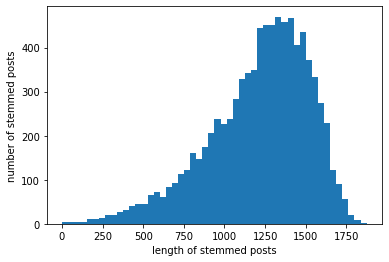

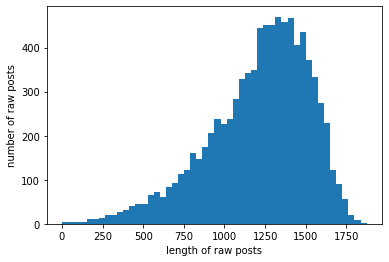

In [17]:
# bagoftoken = tokenizedData.flatten()
# bagofstemmed = stemData.flatten()

print('post의 최대 길이(단어 수) :{}'.format(max(len(l) for l in stemData)))
print('post의 최소 길이 :{}'.format(min(len(l) for l in stemData)))
print('post의 평균 길이 :{}'.format(sum(map(len, stemData))/len(stemData)))
print('post의 전체 길이 :{}'.format(sum(map(len, stemData))))
print('post의 갯수: {}'.format(len(stemData)))
print('첫 post의 단어 개수:{}'.format(len(stemData[0])))

plt.hist([len(s) for s in stemData], bins=50)
plt.xlabel('length of stemmed posts')
plt.ylabel('number of stemmed posts')
plt.show()

plt.hist([len(s) for s in tokenizedData], bins=50)
plt.xlabel('length of raw posts')
plt.ylabel('number of raw posts')
plt.show()

# Vectorization(tfidf)
padding 과정이 따로 필요하지 않은 output이 나와서 padding 생략

In [18]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [19]:


def dummy_fun(doc):
    return doc

tfidf=TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None
)

X = tfidf.fit_transform(stemData)
print(X)

print(y_data)
y = np.array(y_data)
print(y)

# le = LabelEncoder() # string인 'type' label을 int로 바꿔준다 (input: array)
# y = le.fit_transform(y).reshape(-1,1)
# y = to_categorical(y)
'''tf = TfidfVectorizer().fit(stemData)
print(tf.transform(stemData).toarray())
print(tf.vocabulary_)
#print(vector.vocabulary_)'''

  (0, 215484)	0.07970397738849286
  (0, 135346)	0.04572473782029354
  (0, 205310)	0.03950418216234991
  (0, 158065)	0.04066858473970089
  (0, 23848)	0.0109935806265749
  (0, 141006)	0.011381994850527067
  (0, 278900)	0.040253402609101166
  (0, 105270)	0.014199540818957095
  (0, 128750)	0.061839845362681736
  (0, 186259)	0.010992291523457435
  (0, 80119)	0.0391929541257891
  (0, 84095)	0.03344810938677439
  (0, 288699)	0.018554642544113317
  (0, 218864)	0.013689340850182625
  (0, 134021)	0.0612064668042313
  (0, 226365)	0.039820552926778705
  (0, 57549)	0.0399161899873013
  (0, 249687)	0.015142040472794304
  (0, 45592)	0.022988301510518117
  (0, 291298)	0.015917293926600354
  (0, 10629)	0.04979351788638793
  (0, 252187)	0.012140043789887327
  (0, 93076)	0.013783196037802266
  (0, 162449)	0.012433911245716332
  (0, 241971)	0.01857817436817611
  :	:
  (8674, 128827)	0.07222971717357766
  (8674, 171377)	0.01377446594629055
  (8674, 93612)	0.006625261778918338
  (8674, 62031)	0.030993570193

'tf = TfidfVectorizer().fit(stemData)\nprint(tf.transform(stemData).toarray())\nprint(tf.vocabulary_)\n#print(vector.vocabulary_)'

# Garbage Collection

In [20]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

In [21]:
print("Model building Start")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=1234)
model = XGBClassifier()
model.fit(X_train, y_train)


Model building Start


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [22]:
preds = model.predict(X_test)
print("Model building End")

Model building End


In [23]:
import joblib

joblib.dump(model, 'XGBoost_rawsample.pkl')

['XGBoost_rawsample.pkl']

# Evaluation

In [24]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
#from yellowbrick.classifier import ROCAUC

print("Evaluation Start")
# labels과 guesses
labels = preds
guesses = y_test

print(accuracy_score(labels, guesses))
print(recall_score(labels, guesses, average=None))
print(precision_score(labels, guesses, average=None))
print(f1_score(labels, guesses, average=None))

print("Evaluation END")
# https://eunsukimme.github.io/ml/2019/10/21/Accuracy-Recall-Precision-F1-score/

Evaluation Start
0.6519400691509797
[0.45454545 0.67015707 0.69047619 0.64646465 1.         0.5
 0.4        0.35294118 0.65376782 0.65905632 0.66158537 0.65320665
 0.73333333 0.55882353 0.6969697  0.67058824]
[0.3        0.61835749 0.43939394 0.59813084 0.16666667 0.06666667
 0.25       0.26086957 0.71651786 0.78727273 0.678125   0.69620253
 0.41509434 0.44186047 0.34848485 0.63333333]
[0.36144578 0.64321608 0.53703704 0.62135922 0.28571429 0.11764706
 0.30769231 0.3        0.68370607 0.71748136 0.66975309 0.67401961
 0.53012048 0.49350649 0.46464646 0.65142857]
Evaluation END


# Harry Potter MBTI

In [25]:
import nltk
import numpy as np
import pandas as pd

from nltk import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

import re
import glob   

'''HP data Normalization and Stemming'''
# bag_of_words = {} #{등장인물 : 해당인물의 stemData, ~}
h_normalized_text = []
h_stemData = []

ps=PorterStemmer()
stop_words = set(stopwords.words('english'))
input_file = r'.\data\\test\\'

allHPfile_list = glob.glob(os.path.join(input_file, 'HP_*'))
print(allHPfile_list)

harryPotter={}
for file in allHPfile_list:
    df = pd.read_csv(file, sep=',', encoding='iso-8859-1')
    harryPotter[df['Character'][0]] = df['Sentence'].ravel()

print("stemming 시작")
for element in harryPotter.keys():
    for sentence in harryPotter[element]:
        h_clean_sentence = re.sub('[^A-Za-z\s]+', '', sentence.lower())
        h_normalized_text.append(h_clean_sentence)
        for sentence in h_normalized_text:
            tokenData = nltk.word_tokenize(sentence)
            for word in tokenData:
                if word not in stop_words:
                    h_stemData.append(ps.stem(word))
    harryPotter[element] = h_stemData

print("stemming 완료")

['.\\data\\\\test\\HP_DUMBLEDORE.csv', '.\\data\\\\test\\HP_HAGRID.csv', '.\\data\\\\test\\HP_HARRY.csv', '.\\data\\\\test\\HP_HERMIONE.csv', '.\\data\\\\test\\HP_RON.csv']
stemming 시작
stemming 완료


In [26]:
'''HP data Vectorization'''
# import numpy as np
# from sklearn.feature_extraction.text import TfidfVectorizer

stemData = []
hy=[]
for element in harryPotter.keys():
    stemData.append(harryPotter[element])
    hy.append(element)
HX_data = tfidf.transform(stemData)
print(HX_data)
HY_data = np.array(hy)

'''for element in harryPotter.keys():
    tfidf.fit(harryPotter[element])
    script = tfidf.transform(harryPotter[element])
    X.append(script)
    y.append(element)

print(X.shape)'''

  (0, 295533)	0.006257279058320496
  (0, 294926)	0.0012255626260183811
  (0, 294745)	0.02357010061414689
  (0, 294590)	0.007164637215112673
  (0, 294178)	0.0029046286765677136
  (0, 293671)	0.03434768154594255
  (0, 293507)	0.0013856959864529264
  (0, 293458)	0.012745063237962127
  (0, 293340)	0.03201006390766796
  (0, 293301)	0.01619516291077527
  (0, 293300)	0.012766793648597893
  (0, 292855)	0.009503728270048029
  (0, 292224)	0.0037880175192203207
  (0, 292133)	0.0009320535884509212
  (0, 291913)	0.005636510308637897
  (0, 291871)	0.0027801342564624755
  (0, 291567)	0.008391381075629348
  (0, 291475)	0.026638643684539002
  (0, 291321)	0.022157318111683498
  (0, 291298)	0.03713729488150909
  (0, 291007)	0.005522544444982899
  (0, 289477)	0.006433044890311268
  (0, 289285)	0.008247436095926467
  (0, 289256)	0.006905140366216659
  (0, 288972)	1.0779811981335062e-05
  :	:
  (4, 5089)	0.03781338241752158
  (4, 4913)	0.002627017917593523
  (4, 4777)	0.00978049048394462
  (4, 3989)	0.01022

'for element in harryPotter.keys():\n    tfidf.fit(harryPotter[element])\n    script = tfidf.transform(harryPotter[element])\n    X.append(script)\n    y.append(element)\n\nprint(X.shape)'

In [27]:
import joblib  
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

model = joblib.load('XGBoost_rawsample.pkl')
# xgb_model_loaded.get_xgb_params()    # Get xgboost specific parameters.
harrypotter_predict = model.predict(HX_data)
print(harrypotter_predict)

['INFP' 'INFP' 'INFP' 'INFP' 'INFP']
